In [2]:
## 基础模型测试

## 语法正确率
'''

GLM4 9B
GEMMA 9B
LLAma 8B
Qwen7B  
四种模型  四种prompt  训练后的时候评估

'''
import json
import pandas as pd
files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_vector_prompt.json_result.json", 


]


file_names =[]
query1_time =[]
query2_time =[]



column_names  = ['GEMMA_NP','GEMMA_SP','GEMMA_SVP','GEMMA_VP','GLM_NP','GLM_SP','GLM_SVP','GLM_VP','LLAMA_NP','LLAMA_SP','LLAMA_SVP','LLAMA_VP','QWEN_NP','QWEN_SP','QWEN_SVP','QWEN_VP' ,]
NP_data = []
SP_data = []
SVP_data = []
VP_data = []

df = pd.DataFrame()

for index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    count_res = []
    for row in   GLM49B_train_normal_prompt:
        count_res.append(row['err'])
        if row['err'] == True:
            err_num = err_num+1
      
    print(f"{file}结果大小:{len(GLM49B_train_normal_prompt)}.错误个数:{err_num},语法正确率为{100-(err_num/len(GLM49B_train_normal_prompt)*100)}")
    
    df[column_names[index]] = count_res
    if index % 4 == 0:
        NP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 1:
        SP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 2:
        SVP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))
    if index % 4 == 3:
        VP_data.append(100-(err_num/len(GLM49B_train_normal_prompt)*100))   
        
import os  
os.makedirs('train/ana', exist_ok=True)  
df.to_csv('train/ana/out.csv')


       

/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_normal_prompt.json_result.json结果大小:385.错误个数:4,语法正确率为98.96103896103897
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_prompt.json_result.json结果大小:385.错误个数:4,语法正确率为98.96103896103897
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_vector_prompt.json_result.json结果大小:385.错误个数:2,语法正确率为99.48051948051948
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_vector_prompt.json_result.json结果大小:385.错误个数:5,语法正确率为98.7012987012987
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_normal_prompt.json_result.json结果大小:385.错误个数:5,语法正确率为98.7012987012987
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_prompt.json_result.json结果大小:385.错误个数:3,语法正确率为99.22077922077922
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_vector_prompt.json_result.json结果大小:385.错误个数:4,语法正确率为98.96103896103897
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_vector_prompt.json_result.json结果大小:385.错误个数:4,语法正确率为98.96103896103897
/home/work/liuytest/大论文/4评估/1数据预处理/LLama

In [3]:
df 
filtered_df = df[(df['GLM_SP'] == False) & (df['GLM_SVP'] == True)]  
filtered_df 

,GEMMA_NP,GEMMA_SP,GEMMA_SVP,GEMMA_VP,GLM_NP,GLM_SP,GLM_SVP,GLM_VP,LLAMA_NP,LLAMA_SP,LLAMA_SVP,LLAMA_VP,QWEN_NP,QWEN_SP,QWEN_SVP,QWEN_VP
206,True,True,False,False,True,False,True,True,True,True,True,True,False,False,True,True


In [4]:
### 语义正确率分析  精确率 召回率  行、列分别分析
import json


with open("/home/work/liuytest/大论文/4评估/ldbc_normal_test_7_3.json_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/LLama8B_train_vector_prompt.json_result.json",

"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_normal_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_schema_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_schema_vector_prompt.json_result.json",
"/home/work/liuytest/大论文/4评估/1数据预处理/Qwen2.57B_train_vector_prompt.json_result.json", 



]


column_names  = ['GEMMA_NP','GEMMA_SP','GEMMA_SVP','GEMMA_VP','GLM_NP','GLM_SP','GLM_SVP','GLM_VP','LLAMA_NP','LLAMA_SP','LLAMA_SVP','LLAMA_VP','QWEN_NP','QWEN_SP','QWEN_SVP','QWEN_VP' ,]

NP_data_recall = []
SP_data_recall = []
SVP_data_recall = []
VP_data_recall = []

NP_data_precision = []
SP_data_precision = []
SVP_data_precision = []
VP_data_precision = []


for file_index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
        print(file,len(GLM49B_train_normal_prompt))
    err_num = 0
    total_recall=0
    total_precision = 0
    count_recall_res = []
    for index,row in   enumerate(GLM49B_train_normal_prompt) :

        if row['err'] == True:
            err_num = err_num+1
            single_query_recall = 0
            single_query_precision = 0
           
        else:
            correct_row = core_train_result[index]
            if correct_row['output'] == row['output']:
                # print("bangbangbangbangbangbangbangbangbangbangbangbangbangbang")
                pass
            label_rows =  correct_row['rows']
            
            pred_rows = row['rows']
            
            len_total_row = len(label_rows)
            
            if len_total_row != len(pred_rows):
                single_query_recall = 0
                single_query_precision = 0
            else:
                recall=0
                precision = 0
                for index,label_row in  enumerate(label_rows):
                    label_row = [str(data) for data in list(label_row)]
                    pred_colums_set = set(label_row)
                    pred_row = pred_rows[index]
                    pred_row = [str(data) for data in list(pred_row)]
                    label_colums_set = set(pred_row)
                    intersection = pred_colums_set.intersection(label_colums_set)
                    if len(intersection) == len(label_colums_set):
                        # print("colum bangbangbang")
                        pass
                    ### 列的语义分析准确率     回收率
                    recall =  recall+ len(intersection)/len(label_colums_set) *100  
                    ### 列的语义分析准确率     精确率
                    precision = precision + len(intersection)/len(pred_colums_set) *100 
                single_query_recall = recall/len_total_row
                single_query_precision = precision/len_total_row
                 
        count_recall_res.append(single_query_precision)
                
        total_recall = total_recall + single_query_recall
        total_precision = total_precision + single_query_precision
        
    df[column_names[file_index]] = count_recall_res    
    total_recall = total_recall/len(GLM49B_train_normal_prompt)
    total_precision= total_precision/len(GLM49B_train_normal_prompt)                                        
    print(f"{file}的语义回收率为{total_recall}，语义精确率为{total_precision}") 
    
    if file_index % 4 == 0:
        NP_data_recall.append(total_recall)
        NP_data_precision.append(total_precision)
    if file_index % 4 == 1:
        SP_data_recall.append(total_recall)
        SP_data_precision.append(total_precision)
    if file_index % 4 == 2:
        SVP_data_recall.append(total_recall)
        SVP_data_precision.append(total_precision)
    if file_index % 4 == 3:
        VP_data_recall.append(total_recall)
        VP_data_precision.append(total_precision)    
           

/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_normal_prompt.json_result.json 385
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_normal_prompt.json_result.json的语义回收率为89.77759312452407，语义精确率为88.34728727431848
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_prompt.json_result.json 385
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_prompt.json_result.json的语义回收率为90.71606309998732，语义精确率为89.37616773246835
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_vector_prompt.json_result.json 385
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_schema_vector_prompt.json_result.json的语义回收率为90.473096953771，语义精确率为89.57399645288277
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_vector_prompt.json_result.json 385
/home/work/liuytest/大论文/4评估/1数据预处理/gemma9B_train_vector_prompt.json_result.json的语义回收率为88.90126192290263，语义精确率为87.93505878467221
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_normal_prompt.json_result.json 385
/home/work/liuytest/大论文/4评估/1数据预处理/GLM49B_train_normal_pr

In [10]:
df 
filtered_df = df[ df['GLM_SP'] > df['GLM_SVP'] ]  
filtered_df 

,GEMMA_NP,GEMMA_SP,GEMMA_SVP,GEMMA_VP,GLM_NP,GLM_SP,GLM_SVP,GLM_VP,LLAMA_NP,LLAMA_SP,LLAMA_SVP,LLAMA_VP,QWEN_NP,QWEN_SP,QWEN_SVP,QWEN_VP
27,100.000000,100.000000,100.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000
140,0.000000,0.000000,0.000000,0.000000,0.000000,85.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
149,100.000000,66.666667,66.666667,66.666667,100.000000,100.000000,66.666667,100.000000,66.666667,66.666667,66.666667,33.333333,66.666667,66.666667,66.666667,66.666667
182,81.818182,90.909091,100.000000,81.818182,81.818182,81.818182,72.727273,90.909091,81.818182,81.818182,81.818182,81.818182,90.909091,72.727273,72.727273,81.818182
183,92.042440,92.042440,92.042440,92.042440,92.042440,99.712644,92.042440,92.042440,92.042440,92.042440,92.042440,92.042440,99.712644,92.042440,92.042440,99.712644
187,88.846561,88.846561,88.894180,88.846561,88.894180,88.894180,88.846561,88.846561,88.846561,88.894180,88.370370,100.000000,88.894180,88.894180,88.846561,88.846561
193,100.000000,100.000000,100.000000,99.329502,100.000000,100.000000,99.329502,83.333333,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
198,87.878788,86.147186,91.774892,87.445887,90.909091,88.311688,87.012987,86.147186,87.012987,87.445887,88.311688,92.207792,87.878788,66.666667,93.506494,85.281385
199,60.606061,65.800866,66.017316,63.203463,62.337662,69.480519,59.523810,62.770563,60.173160,63.419913,68.398268,65.800866,69.480519,64.502165,72.510823,72.943723
206,0.000000,0.000000,72.294372,64.069264,0.000000,61.616162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.367965,64.502165,0.000000,0.000000


In [11]:
### 需要出个图表 直观的看看效果
### 还需要出一个细致的表格分析，看看问题究竟出现在了哪里


### Qwen0.5B 和 3B 微调之后为什么没有效果 而1.5B 却又效果

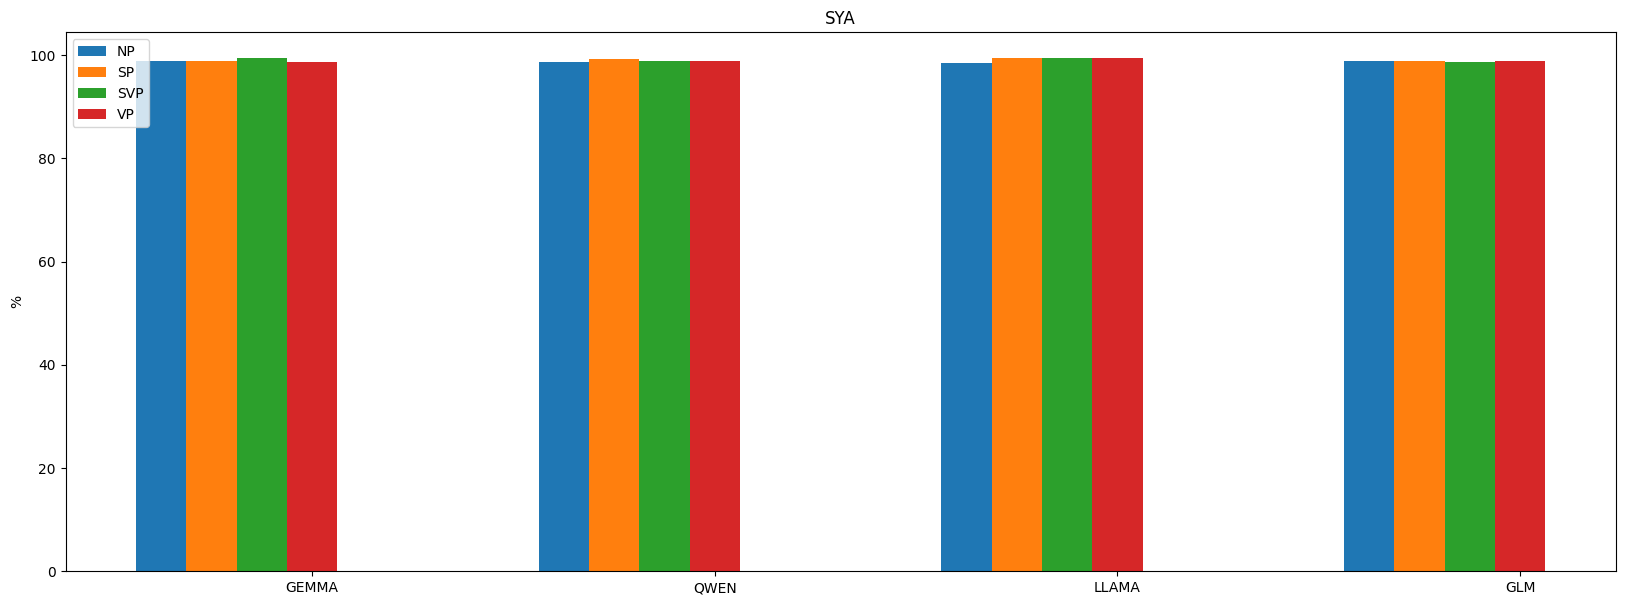

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data,
    'SP':SP_data,
    'SVP': SVP_data,
    'VP':VP_data,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('SYA')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

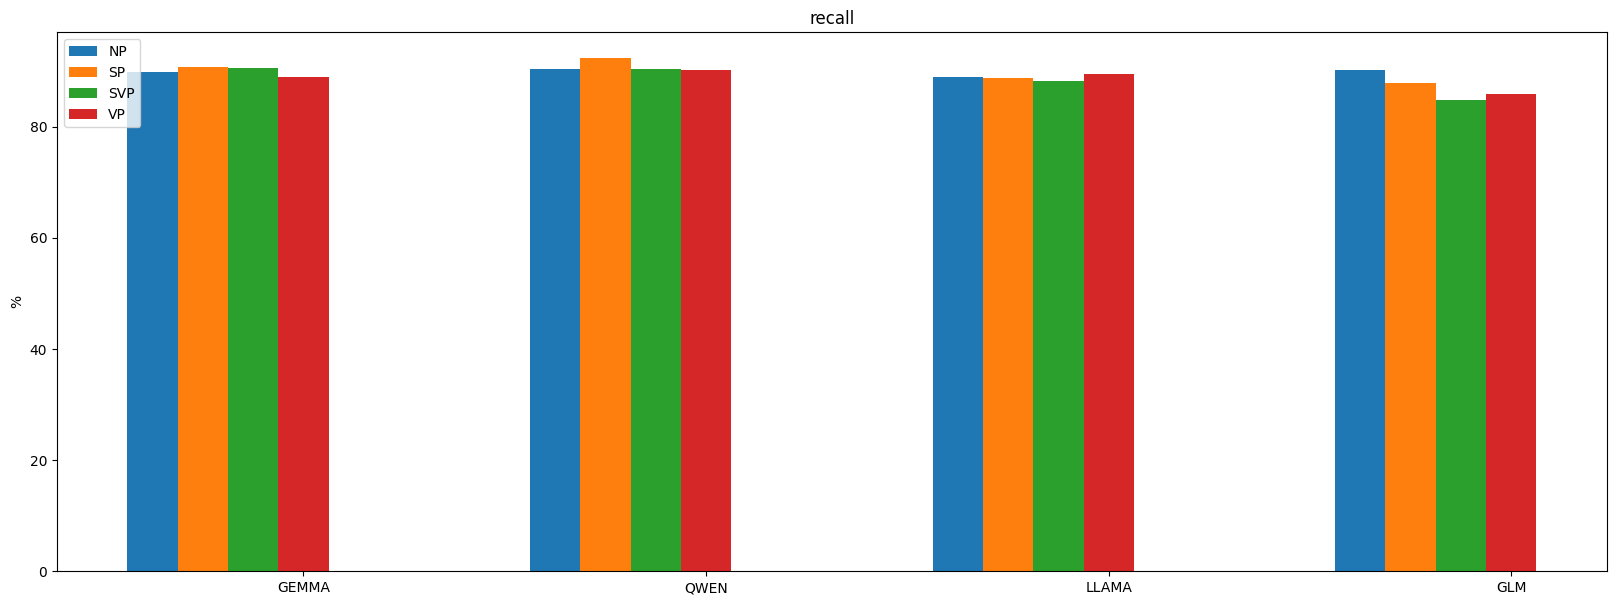

In [13]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data_recall,
    'SP':SP_data_recall,
    'SVP': SVP_data_recall,
    'VP':VP_data_recall,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('recall')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

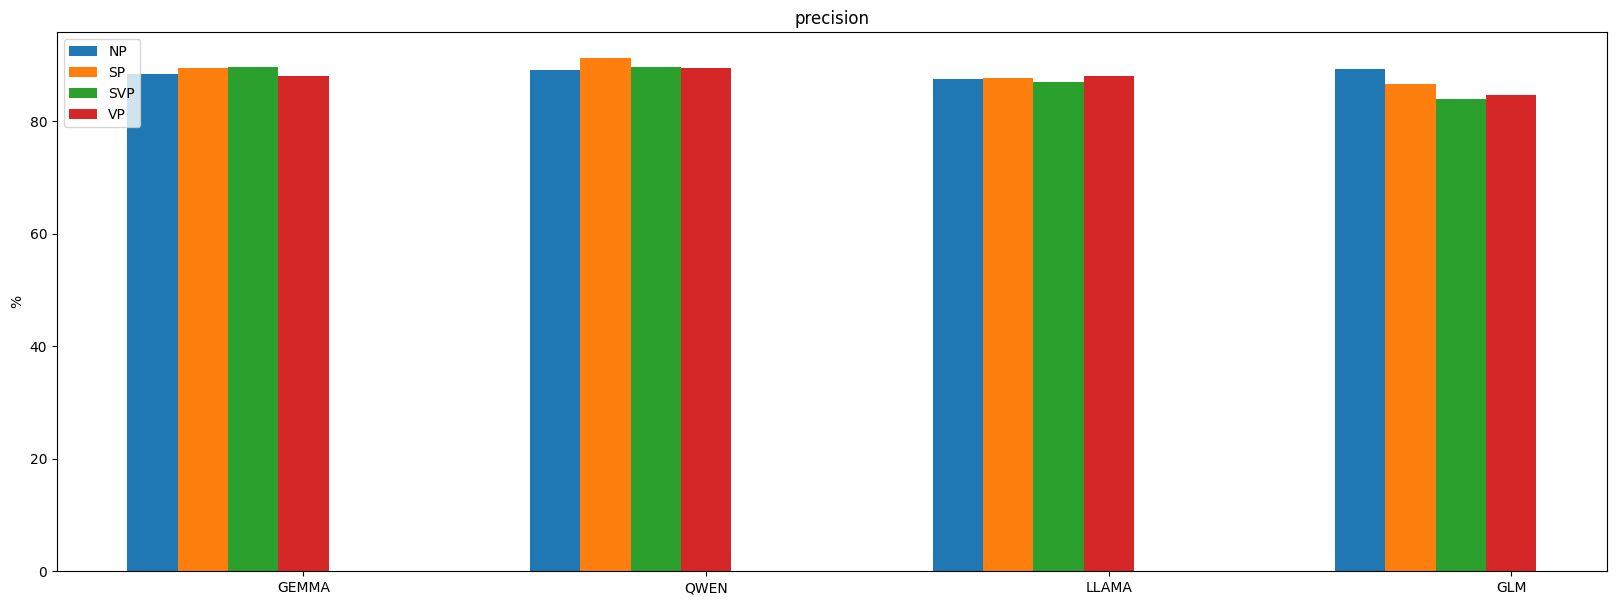

In [9]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['GEMMA','QWEN','LLAMA','GLM']
penguin_means = {
    'NP':NP_data_precision,
    'SP':SP_data_precision,
    'SVP': SVP_data_precision,
    'VP':VP_data_precision,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('precision')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()